In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\micro\\Downloads\\Compressed\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv",encoding = 'utf-8')

#already checked in previous file no duplicte and no null exsit at all

#Machine learning MOdel

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


#understanable form for Machine

In [5]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df = pd.get_dummies(df , drop_first=True)

#for model selection

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['Churn'] , axis =1)
Y = df['Churn']
X_train,X_test , Y_train,Y_test = train_test_split(X,Y, test_size =0.2,random_state = 42)

#fit in model

In [10]:
from sklearn.linear_model import  LogisticRegression

In [11]:
model = LogisticRegression(max_iter =1000)
model.fit (X_train ,Y_train)

C:\Users\micro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#doing prediction

In [12]:
Y_pred = model.predict(X_test)

#accuracy_prediction

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print('accuracy_in model_testing' , accuracy_score(Y_test,Y_pred))

accuracy_in model_testing 0.8232789212207239


#some important testinf for model
#R2_score = tell how much data present by model
#MAE tell the error 
#MSE tell the big error

In [16]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [18]:
Y_pred=model.predict(X_test)


In [21]:
print('R2_score' ,r2_score(Y_test, Y_pred))
print('MAE:\n',mean_absolute_error(Y_test,Y_pred))
print('MAE:\n',mean_squared_error(Y_test,Y_pred))

R2_score 0.09209218793669216
MAE:
 0.1767210787792761
MAE:
 0.1767210787792761


#the previous acuuracy error all about these detail is linear_regression

#use diffrent_model to check which one is more compatable 

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
Y_pred_tree = model.predict(X_test)

#how much model present data almost same in both model

In [27]:
print('R2_score', r2_score(Y_test,Y_pred_tree))

R2_score 0.09209218793669216


#same here MAE almost

In [28]:
print('MAE:\n',mean_absolute_error(Y_test,Y_pred_tree))

MAE:
 0.1767210787792761


In [32]:
import matplotlib.pyplot as plt

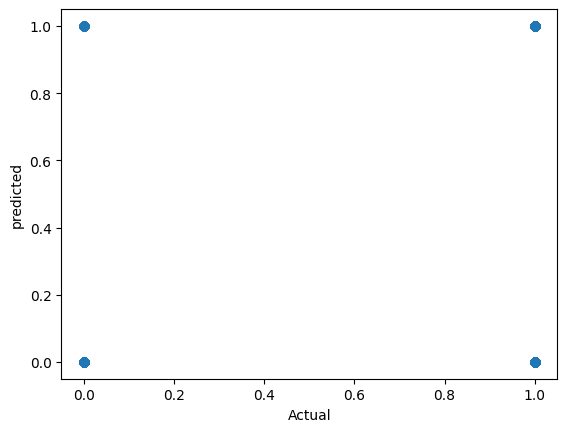

In [34]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

#use to find the best method for model

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model = LogisticRegression()

In [41]:
perm_grid = {
    'C' : [0.01,0.1,1,10,100],
    'penalty':['l1','l2'],
    'solver' : ['liblinear']
}

In [43]:
grid = GridSearchCV(model,perm_grid,cv=5)
grid.fit(X_train,Y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [44]:
print('best parameter',grid.best_params_)
print('best_score',grid.best_score_)

best parameter {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
best_score 0.8017379011222993


NOTE:
#so for in comparision and we can see both model work same maybe another model work diffrent but according to grid serach cv the 
satistifiction method is 0.80 thats mean 80% correction in this model 